In [7]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.3.0'

In [2]:
keras.__version__

'2.4.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test)= fashion_mnist.load_data()

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_test.shape

(10000,)

In [6]:
X_train_full.shape
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid, y_train =y_train_full[:5000], y_train_full[5000:]
# Divide by 255 for scaling purposes between 0-1

In [8]:
X_valid.size

3920000

In [9]:
X_train.size

43120000

In [10]:
X_train_full.size

47040000

In [26]:
# X_train_full

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot" ]

In [13]:
class_names[y_train[0]]

'Coat'

In [14]:
y_train[0]

4

In [63]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation ="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
# Final evaluation is a classification problem wherein we have to select between 10 values 
# softmax is ideal as we would then have a probability of x being equal to some else something else

In [16]:
# First single set of API's developed from keras
# New layer added to model/preprocessing step
# 3. dense hidden layer with 300 neurons and relu activation function
# 4. second hidden layer with neurons and relu activation function
# 5. function with 10 classes-output one for each

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 356,910
Trainable params: 356,910
Non-trainable params: 0
_________________________________________________________________


In [56]:
hidden1=model.layers[1]
hidden1.name

'dense_6'

In [57]:
weights, biases = hidden1.get_weights()

In [20]:
weights.shape

(784, 300)

In [58]:
weights

array([[-0.02990543, -0.06551526,  0.06391715, ..., -0.06453338,
        -0.0240176 ,  0.00102703],
       [ 0.00588735, -0.06849927,  0.0574522 , ..., -0.01826901,
        -0.00101209,  0.02254261],
       [-0.01257364,  0.04291601,  0.01388258, ...,  0.05427918,
        -0.04549875, -0.06607477],
       ...,
       [-0.06957345, -0.07180129, -0.00575317, ...,  0.06839702,
         0.01340085, -0.05910885],
       [-0.04480129,  0.02607704,  0.03340407, ...,  0.07057977,
        -0.05724777, -0.01623755],
       [-0.03722001, -0.05865268, -0.07064929, ...,  0.0134689 ,
        -0.03547816, -0.03449786]], dtype=float32)

In [59]:
biases.shape

(300,)

In [77]:
model.compile(loss="sparse_categorical_crossentropy", 
            optimizer="sgd",
             metrics=["accuracy"])
# Key difference between categorical and spare result types
# "sgd" means Stochastic Gradient Descent
#               optimizer =keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, 
#                                                 epsilon=1e-07, name="Nadam"),

In [78]:
history = model.fit(X_train, y_train, epochs=30,
... validation_data=(X_valid, y_valid))

# When to implement learning rate adaptation/exponential decay over time in the optimizer
# One can see with the increases in epoch, the validation losses are going down whereas the accuracy is 
# going up. Moreover, the accuracy for validation and training seem to be at par, therefore there is
# no overfitting

# At times, for labeling done by experts more weightage can be provided whereas for crowd sourced labels
# less weight can be provided. Again, for screwed data  form such as more of particular instance than 
# other, one could use class_weight to balance the bias in data set

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0862 - accuracy: 0.9678 - val_loss: 0.4038 - val_accuracy: 0.9058
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0759 - accuracy: 0.9720 - val_loss: 0.4101 - val_accuracy: 0.9070
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0722 - accuracy: 0.9732 - val_loss: 0.4173 - val_accuracy: 0.9064
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0701 - accuracy: 0.9738 - val_loss: 0.4161 - val_accuracy: 0.9070
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0683 - accuracy: 0.9749 - val_loss: 0.4227 - val_accuracy: 0.9074
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0669 - accuracy: 0.9756 - val_loss: 0.4273 - val_accuracy: 0.9072
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0657 - accuracy: 0.9759 - val_loss: 0.4308 - val_accuracy:

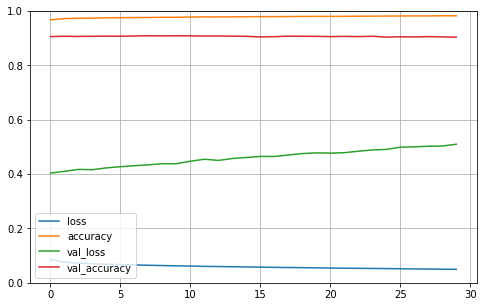

In [79]:
# Getting plots of the data set
# history.history is the loss and extras metric/accuracy with respect to the epoch metric
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
# Note: Validation and training are not overlapping/simultaneous. Training must be sifted by half an epoch
# Using standard optimiser(lr=0.01), the val_accuracy is 0.8890. Let's change that, lr=0.001, accuarcy is
# 

In [80]:
model.evaluate(X_test, y_test)
# loss:91.0028? Why is this value not in decimal terms -accuracy: 0.8672

313/313 [==============================] - 1s 3ms/step - loss: 127.8986 - accuracy: 0.8694


[127.89859771728516, 0.8694000244140625]

In [83]:
X_new =X_test[:3]

In [84]:
y_proba= model.predict(X_new)

In [85]:
y_proba.round(3)
# Rounded to second decimal place. 
# SHould be showing probability, instead provides the values as 1

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [87]:
# y_pred= model.predict_classes(X_new)
y_pred =(model.predict(X_new) > 0.5).astype("int32")

In [88]:
y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [92]:

y_pred= model.predict_classes(X_new)

In [93]:
y_pred

array([9, 2, 1], dtype=int64)

In [95]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

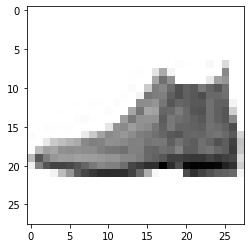

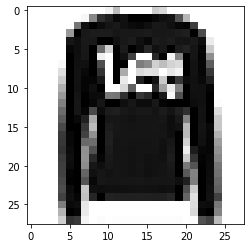

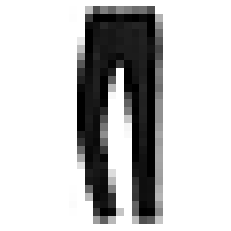

In [103]:
image1=X_new[0].reshape(28,28)
image2=X_new[1].reshape(28,28)
image3=X_new[2].reshape(28,28)

plt.imshow(image1,cmap="binary")
plt.show()
plt.imshow(image2,cmap="binary")
plt.show()
plt.imshow(image3,cmap="binary")
plt.axis("off")
plt.show()

# Restart Kernel to run regression models

In [3]:
# Regression development using Multi-layer perceptron
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing =fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid=train_test_split(
X_train_full, y_train_full)

scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test) 


In [3]:
# Model preparation for regression analysis, one layer at the end since one value is to be output
# Single layer perceptron/SEQUENTIAL API's
# Evaluation of the model is done using Root_Mean_squared_error
model = keras.models.Sequential([
    keras.layers.Dense(30, activation ="relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer ="sgd")
# history =  model.fit(X_train, y_train, epochs=20,
#                     validation_data=(X_valid, y_valid))


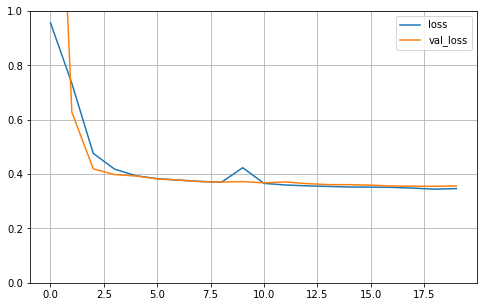

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [6]:
mse_test=model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred=model.predict(X_new)
y_pred

162/162 [==============================] - 0s 2ms/step - loss: 0.3641


array([[2.8316631],
       [3.688012 ],
       [4.2132072]], dtype=float32)

In [7]:
y_test[:3]

array([3.312, 1.5  , 3.796])

# Restart kernel

In [4]:
# Building complex models using functional API
# For Image classificaton, the input shapes were in [28*28]
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])
# Keras model which inputs and outputs to use

In [10]:
# Compiling and training/running and evaluating final results
# model.compile(loss="mean_squared_error", optimizer ="sgd")
# lr not reset on compilation, therefore we get errors
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history =  model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2085 - val_loss: 0.7389
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6671 - val_loss: 0.6420
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6116 - val_loss: 0.6015
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5787 - val_loss: 0.5730
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5524 - val_loss: 0.5495
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5317 - val_loss: 0.5303
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5155 - val_loss: 0.5150
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5013 - val_loss: 0.5011
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4857 - val_loss: 0.4880
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4754 - val_loss: 0.4767

In [11]:
mse_test=model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred=model.predict(X_new)
y_pred

162/162 [==============================] - 0s 805us/step - loss: 0.4148


array([[2.0006957],
       [2.2428377],
       [1.4371008]], dtype=float32)

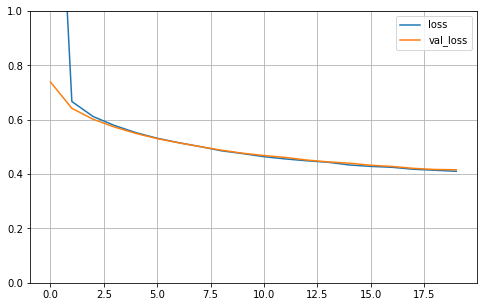

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
# Segregating features to pass through different points in space
# Some which go through one set of layers/ others passing through another set of layers

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation ="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation ="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [55]:
# Since the model is not quite the same as the previous model, 2 inputs have to be passed 
model.compile(loss="mse", optimizer = keras.optimizers.SGD(lr=1e-3))
# Sending 5 features[0-4] through wide_path, 6 features[2-7] through deep_input
# 0-4 features[:5] features[2:7], reverse the order and select items leaving out 2 and others[2:]

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A , X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [56]:
history = model.fit((X_train_A, X_train_B), y_train, epochs =20,
                   validation_data = ((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)


Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3673 - val_loss: 0.3776
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3662 - val_loss: 0.3763
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3656 - val_loss: 0.3766
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3652 - val_loss: 0.3757
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3644 - val_loss: 0.3751
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3637 - val_loss: 0.3745
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3629 - val_loss: 0.3734
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3624 - val_loss: 0.3733
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3615 - val_loss: 0.3720
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3608 - val_loss: 0.3736

In [63]:
y_pred=model.predict((X_new_A, X_new_B))
y_pred


array([[2.9940586],
       [2.4767895],
       [2.821614 ]], dtype=float32)

In [64]:
y_test[:3]

array([2.634, 2.793, 3.42 ])

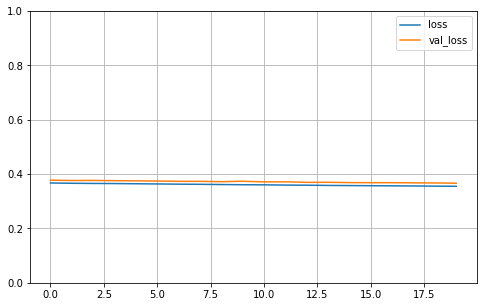

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
# FOr some reason the loss and validatio_losses are not changing/evolving with time

# Developing models with Auxillary functions

In [91]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation ="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation ="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs = [output, aux_output])

In [92]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
# 2 model compiler losses have to be passed

In [71]:
history = model.fit(
    [X_train_A, X_train_B],[y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9773 - output_loss: 0.8697 - aux_output_loss: 1.9460 - val_loss: 1.0151 - val_output_loss: 0.9850 - val_aux_output_loss: 1.2855
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6492 - output_loss: 0.5925 - aux_output_loss: 1.1597 - val_loss: 0.8938 - val_output_loss: 0.8734 - val_aux_output_loss: 1.0775
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6163 - output_loss: 0.5698 - aux_output_loss: 1.0348 - val_loss: 1.0308 - val_output_loss: 0.9083 - val_aux_output_loss: 2.1337
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6079 - output_loss: 0.5435 - aux_output_loss: 1.1875 - val_loss: 0.7594 - val_output_loss: 0.7400 - val_aux_output_loss: 0.9345
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5285 - output_loss: 0.4936 - aux_output_loss: 0.8428 - val_loss: 0.4575 - val_output_loss: 0.4230 - val_aux_

In [79]:
model.save("my_keras_model.h5")

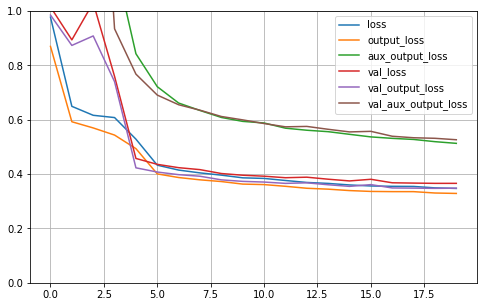

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
# Not quite sure but the auxillary losses seem to be higher than losses in general in the output

In [73]:
total_loss, main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B],[y_test, y_test])
# Compared to auxillary output losses, main losses are lower

162/162 [==============================] - 0s 2ms/step - loss: 0.3836 - output_loss: 0.3679 - aux_output_loss: 0.5246


In [76]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [77]:
y_pred_main

array([[3.0916638],
       [2.365606 ],
       [2.8823504]], dtype=float32)

In [81]:
y_pred_aux

array([[3.1369724],
       [2.3583958],
       [2.8779907]], dtype=float32)

# This is for tensorflow callback

In [26]:
import tensorflow as tf
from tensorflow import keras
tf.__version__
import numpy as np

In [5]:
# Tesnorboard visualization of parameters and run
import os 
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()


In [1]:
# After building and compiling model
# tensorboard_cb = keras.callback.TensorBoard(run_logdir)
# history = model.fit(
#     [X_train_A, X_train_B],[y_train, y_train], epochs=20,
#     validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
#     callbacks= [tensorboard_cb])
# Let's use the tensorflow visualisation for a simpler model

In [6]:
# Building complex models using functional API
# For Image classificaton, the input shapes were in [28*28]
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])
# Keras model which inputs and outputs to use

In [7]:
# Compiling and training/running and evaluating final results
# model.compile(loss="mean_squared_error", optimizer ="sgd")
# lr not reset on compilation, therefore we get errors
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
# history =  model.fit(X_train, y_train, epochs=20,
#                     validation_data=(X_valid, y_valid))

In [8]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 3.2480WARNING:tensorflow:From C:\Users\Sangram\miniconda3\envs\Hands_conda\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 1s 4ms/step - loss: 1.8298 - val_loss: 0.7545
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7319 - val_loss: 0.6258
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6753 - val_loss: 0.5978
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6446 - val_loss: 0.5711
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6188 - val_loss: 0.5524
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5975 - val_loss: 0.5360
Epoch 7/30
363/363 [=============

In [17]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006


Reusing TensorBoard on port 6006 (pid 24928), started 0:08:50 ago. (Use '!kill 24928' to kill it.)

In [16]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [ ]:
# Rerun the tensorboard code with reload to run the updated tensorboard flow
%reload_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006


# Hyperparameter tuning keras

In [33]:
# Building a keras model with all the hyperparameters defined
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=
               [8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
#     Alternatively, used in the previous model, model.add(keras.layers.Flatten(input_shape=[]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
        model.add(keras.layers.Dense(1))    
        optimizer = keras.optimizers.SGD(lr=learning_rate)
        model.compile(loss="mse", optimizer=optimizer)
        return model
# Typical: model.add(keras.layers.Dense(100, activation="relu"))
# Note: We are compiling the model after addition of every loop/perhaps this is useful for iterative process

In [ ]:
# Typical MLP with hidden layers
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))
# We see the addition of the keras.layers.Dense is added with the for loop

In [34]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [35]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data = (X_valid, y_valid),
              callbacks = [keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.3119 - val_loss: 0.6731
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6945 - val_loss: 0.5800
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6065 - val_loss: 0.5189
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5651 - val_loss: 0.4885
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5423 - val_loss: 0.4756
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5244 - val_loss: 0.4647
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4949 - val_loss: 0.4564
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4995 - val_loss: 0.4517
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4882 - val_loss: 0.4498
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4831 - val_lo

363/363 [==============================] - 1s 2ms/step - loss: 0.3582 - val_loss: 0.3446
Epoch 82/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3582 - val_loss: 0.3442
Epoch 83/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3646 - val_loss: 0.3438
Epoch 84/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3581 - val_loss: 0.3417
Epoch 85/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3620 - val_loss: 0.3405
Epoch 86/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3528 - val_loss: 0.3399
Epoch 87/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3552 - val_loss: 0.3476
Epoch 88/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3559 - val_loss: 0.3395
Epoch 89/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3519 - val_loss: 0.3409
Epoch 90/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3524 - val_loss: 

NameError: name 'X_new' is not defined

In [37]:
X_new = X_test[:3]
# y_pred=model.predict(X_new)
# y_pred
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

162/162 [==============================] - 0s 2ms/step - loss: 0.3338


In [38]:
y_pred

array([2.4649298, 2.855674 , 2.0164957], dtype=float32)